In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Daniela/Desktop/Bg Data/admission_data.csv')
# Afișează primele 5 rânduri
print(df.head())


   student_id judet_stud University faculty  field_id         field_name  \
0           1  București      UMFCD     UMF         1  Medicină Generală   
1           2       Cluj      UMFCD     UMF         1  Medicină Generală   
2           3       Iași      UMFCD     UMF         2   Medicină Dentară   
3           4      Timiș      UMFCD     UMF         2   Medicină Dentară   
4           5  Constanța      UMFCD     UMF         3           Farmacie   

  series_nr   admission_type high_school_bac_score entrance_exam_score  \
0   Seria A  Examen Admitere                     -                 9.5   
1   Seria A  Examen Admitere                     -                 8.7   
2   Seria B      Bacalaureat                   9.2                   -   
3   Seria B      Bacalaureat                   8.6                   -   
4   Seria C      Bacalaureat                   8.3                   -   

   admission_score  year scholarship status          admited_cityes  \
0              9.5  2019   

In [3]:
import pandas as pd
import numpy as np

# Citirea setului de date
file_path = '/mnt/data/admission_data.csv'
df = pd.read_csv('C:/Users/Daniela/Desktop/Bg Data/admission_data.csv')

# Secțiunea 1: Informații generale despre dataset
print("=== Informații generale ===")
print(df.info())

# Secțiunea 2: Statistici descriptive
print("\n=== Statistici descriptive ===")
print(df.describe())

# Secțiunea 3: Verificarea valorilor lipsă
print("\n=== Verificarea valorilor lipsă ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Secțiunea 4: Explorarea valorilor unice
print("\n=== Valorile unice pentru coloanele categorice ===")

# Verificăm fiecare coloană categorică individual
print("\nColoana: judet_stud")
print(df['judet_stud'].unique())

print("\nColoana: University")
print(df['University'].unique())

print("\nColoana: faculty")
print(df['faculty'].unique())

print("\nColoana: field_name")
print(df['field_name'].unique())

print("\nColoana: admission_type")
print(df['admission_type'].unique())

print("\nColoana: scholarship")
print(df['scholarship'].unique())

print("\nColoana: status")
print(df['status'].unique())

# Secțiunea 5: Afișarea primelor 5 rânduri
print("\n=== Primele 5 rânduri ===")
print(df.head())

=== Informații generale ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             500 non-null    int64  
 1   judet_stud             500 non-null    object 
 2   University             500 non-null    object 
 3   faculty                500 non-null    object 
 4   field_id               500 non-null    int64  
 5   field_name             500 non-null    object 
 6   series_nr              500 non-null    object 
 7   admission_type         500 non-null    object 
 8   high_school_bac_score  500 non-null    object 
 9   entrance_exam_score    497 non-null    object 
 10  admission_score        500 non-null    float64
 11  year                   500 non-null    int64  
 12  scholarship            500 non-null    object 
 13  status                 500 non-null    object 
 14  admited_cityes         500 non

In [4]:
import numpy as np

# Înlocuirea valorilor lipsă din `entrance_exam_score`
df['entrance_exam_score'] = df['entrance_exam_score'].replace('-', np.nan).astype(float)

# Tratarea valorilor lipsă prin imputare cu media coloanei
df['entrance_exam_score'].fillna(df['entrance_exam_score'].mean(), inplace=True)

# Convertim `high_school_bac_score` din text în valori numerice
df['high_school_bac_score'] = df['high_school_bac_score'].replace('-', np.nan).astype(float)

# Tratarea valorilor lipsă din `high_school_bac_score` (dacă există)
df['high_school_bac_score'].fillna(df['high_school_bac_score'].mean(), inplace=True)

# Codificarea variabilelor categorice utilizând OneHotEncoder
categorical_columns = ['field_name', 'admission_type', 'scholarship', 'status']
encoded_data = pd.get_dummies(df[categorical_columns], drop_first=True)

# Concatenarea datelor codificate în datasetul inițial și eliminarea coloanelor categorice originale
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_data], axis=1)

# Confirmăm modificările
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   student_id                        500 non-null    int64  
 1   judet_stud                        500 non-null    object 
 2   University                        500 non-null    object 
 3   faculty                           500 non-null    object 
 4   field_id                          500 non-null    int64  
 5   series_nr                         500 non-null    object 
 6   high_school_bac_score             500 non-null    float64
 7   entrance_exam_score               500 non-null    float64
 8   admission_score                   500 non-null    float64
 9   year                              500 non-null    int64  
 10  admited_cityes                    500 non-null    object 
 11  admited_universities              500 non-null    object 
 12  admited_

C:\Users\Daniela\AppData\Local\Temp\ipykernel_20504\391879638.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['entrance_exam_score'].fillna(df['entrance_exam_score'].mean(), inplace=True)
C:\Users\Daniela\AppData\Local\Temp\ipykernel_20504\391879638.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

(None,
    student_id judet_stud University faculty  field_id series_nr  \
 0           1  București      UMFCD     UMF         1   Seria A   
 1           2       Cluj      UMFCD     UMF         1   Seria A   
 2           3       Iași      UMFCD     UMF         2   Seria B   
 3           4      Timiș      UMFCD     UMF         2   Seria B   
 4           5  Constanța      UMFCD     UMF         3   Seria C   
 
    high_school_bac_score  entrance_exam_score  admission_score  year  \
 0               8.591985             9.500000              9.5  2019   
 1               8.591985             8.700000              8.7  2019   
 2               9.200000             8.555485              9.2  2019   
 3               8.600000             8.555485              8.6  2019   
 4               8.300000             8.555485              8.3  2019   
 
            admited_cityes admited_universities  \
 0  București, Cluj-Napoca       UMFCD, UMFCLUJ   
 1    București, Timișoara          UMFCD

In [10]:
# Eliminăm coloanele irelevante pentru analiza ulterioară
columns_to_drop = [
    'judet_stud', 'University', 'faculty', 'series_nr', 
    'admited_cityes', 'admited_universities', 'admited_faculty'
]
df_cleaned = df.drop(columns=columns_to_drop, axis=1)


Mean Squared Error (MSE): 0.7809048370082048


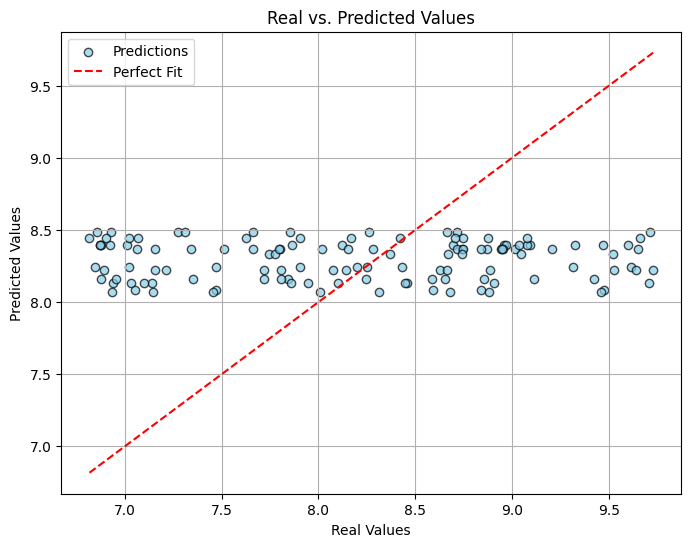

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset for demonstration purposes
np.random.seed(42)
data = {
    'admission_score': np.random.uniform(6.8, 9.75, 500),
    'student_id': np.arange(1, 501),
    'feature_1': np.random.choice(['A', 'B', 'C'], 500),
    'feature_2': np.random.randint(1, 5, 500)
}
df = pd.DataFrame(data)

# Convert categorical variables into dummy/indicator variables
df_cleaned = pd.get_dummies(df, columns=['feature_1', 'feature_2'], drop_first=True)

# Prepare data for modeling
X = df_cleaned.drop(['admission_score', 'student_id'], axis=1)
y = df_cleaned['admission_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build the Random Forest model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Visualization: Real vs. Predicted Values (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue', edgecolor='black', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.title("Real vs. Predicted Values")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd

# Încarcă fișierul CSV sau definește df dacă nu ai deja datele
df = pd.read_csv('C:/Users/Daniela/Desktop/Bg Data/admission_data.csv')

# Verifică primele rânduri ale DataFrame-ului
print(df.head())


   student_id judet_stud University faculty  field_id         field_name  \
0           1  București      UMFCD     UMF         1  Medicină Generală   
1           2       Cluj      UMFCD     UMF         1  Medicină Generală   
2           3       Iași      UMFCD     UMF         2   Medicină Dentară   
3           4      Timiș      UMFCD     UMF         2   Medicină Dentară   
4           5  Constanța      UMFCD     UMF         3           Farmacie   

  series_nr   admission_type high_school_bac_score entrance_exam_score  \
0   Seria A  Examen Admitere                     -                 9.5   
1   Seria A  Examen Admitere                     -                 8.7   
2   Seria B      Bacalaureat                   9.2                   -   
3   Seria B      Bacalaureat                   8.6                   -   
4   Seria C      Bacalaureat                   8.3                   -   

   admission_score  year scholarship status          admited_cityes  \
0              9.5  2019   

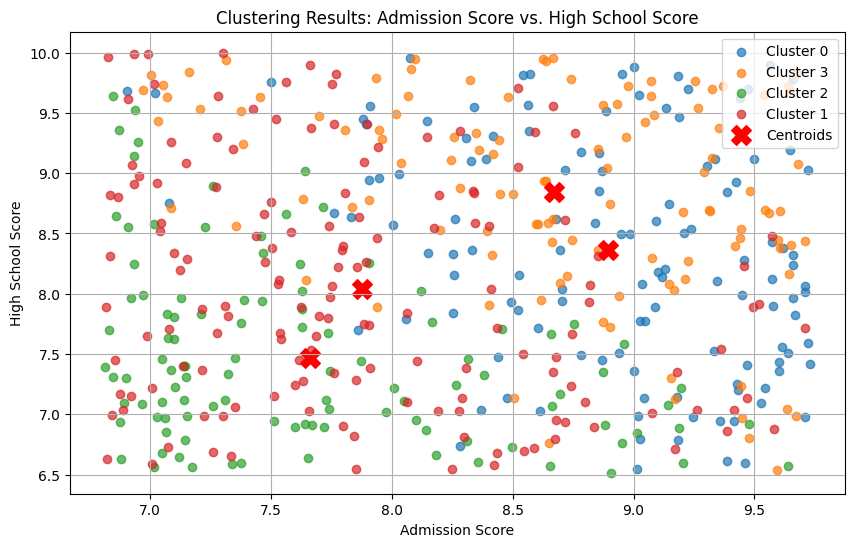

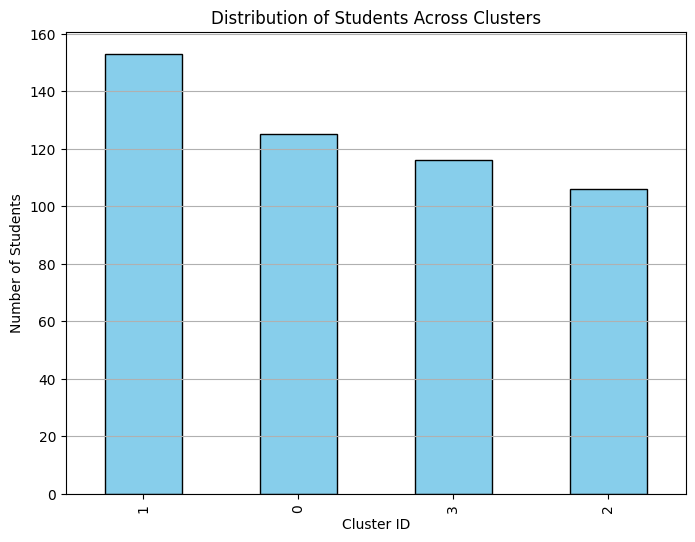

Cluster Summary Statistics:
         admission_score  high_school_bac_score  entrance_exam_score  \
Cluster                                                                
0               8.895922               8.362056             8.745485   
1               7.878767               8.040318             8.314418   
2               7.663070               7.470818             8.889078   
3               8.669409               8.845539             8.351754   

         feature_1  feature_2  
Cluster                        
0         3.656000   2.416000  
1         2.313725   3.751634  
2         2.405660   1.622642  
3         1.620690   1.775862  


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset for demonstration
np.random.seed(42)
data = {
    'admission_score': np.random.uniform(6.8, 9.75, 500),
    'high_school_bac_score': np.random.uniform(6.5, 10.0, 500),
    'entrance_exam_score': np.random.uniform(7.0, 10.0, 500),
    'feature_1': np.random.randint(1, 5, 500),
    'feature_2': np.random.randint(1, 5, 500)
}
df = pd.DataFrame(data)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster centroids to the dataset
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
centroids['Cluster'] = range(len(centroids))

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster_id in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['admission_score'], cluster_data['high_school_bac_score'],
                label=f"Cluster {cluster_id}", alpha=0.7)
plt.scatter(centroids['admission_score'], centroids['high_school_bac_score'], 
            color='red', marker='X', s=200, label='Centroids')
plt.title("Clustering Results: Admission Score vs. High School Score")
plt.xlabel("Admission Score")
plt.ylabel("High School Score")
plt.legend()
plt.grid(True)
plt.show()

# Visualize distribution of clusters
cluster_counts = df['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Students Across Clusters")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.show()

# Show summary statistics for each cluster
summary_stats = df.groupby('Cluster').mean()
print("Cluster Summary Statistics:")
print(summary_stats)


In [23]:
import pandas as pd
import numpy as np
import folium
from IPython.display import display

# Load the CSV file
df = pd.read_csv('C:/Users/Daniela/Desktop/Bg Data/admission_data.csv')

# Replace non-numeric values ('-') with NaN
df['high_school_bac_score'] = pd.to_numeric(df['high_school_bac_score'], errors='coerce')
df['entrance_exam_score'] = pd.to_numeric(df['entrance_exam_score'], errors='coerce')
df['admission_score'] = pd.to_numeric(df['admission_score'], errors='coerce')

# Handle missing values by filling with the column mean
df['high_school_bac_score'] = df['high_school_bac_score'].fillna(df['high_school_bac_score'].mean())
df['entrance_exam_score'] = df['entrance_exam_score'].fillna(df['entrance_exam_score'].mean())
df['admission_score'] = df['admission_score'].fillna(df['admission_score'].mean())

# Generate synthetic location data with strict bounds and include two intentional outliers
np.random.seed(42)
df['latitude'] = np.random.uniform(44.0, 47.0, len(df))  # Latitude range for Romania
df['longitude'] = np.random.uniform(22.0, 29.0, len(df))  # Longitude range for Romania

# Introduce two intentional outliers
df.loc[10, ['latitude', 'longitude']] = [47.2, 27.8]  # Example outlier near Moldova
df.loc[18, ['latitude', 'longitude']] = [47.3, 27.9]  # Another outlier near Moldova

# Apply clustering
features = df[['admission_score', 'high_school_bac_score', 'entrance_exam_score']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Create a Folium map centered on Romania
romania_map = folium.Map(location=[45.0, 25.0], zoom_start=6)

# Add markers for each student
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        popup=f"Cluster: {row['Cluster']}<br>Admission Score: {row['admission_score']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(romania_map)

# Display the map directly in the notebook
display(romania_map)

# Confirmation message
print("The map with synthetic coordinates and two intentional outliers is displayed directly in the notebook.")


The map with synthetic coordinates and two intentional outliers is displayed directly in the notebook.


In [4]:
import pandas as pd
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
data = {
    'admission_score': np.random.uniform(6.8, 9.75, 500),
    'high_school_bac_score': np.random.uniform(6.5, 10.0, 500),
    'entrance_exam_score': np.random.uniform(7.0, 10.0, 500),
    'feature_1': np.random.randint(1, 5, 500),
    'feature_2': np.random.randint(1, 5, 500)
}
df = pd.DataFrame(data)

# Generate synthetic location data
df['latitude'] = np.random.uniform(44.0, 47.0, len(df))  # Example latitude range for Romania
df['longitude'] = np.random.uniform(22.0, 29.0, len(df))  # Example longitude range for Romania


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Apply clustering if not done already
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['admission_score', 'high_school_bac_score', 'entrance_exam_score']])

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate distances to universities
from geopy.distance import geodesic

def calculate_nearest_university(student_lat, student_lon, universities):
    distances = universities.apply(
        lambda row: geodesic((student_lat, student_lon), (row['latitude'], row['longitude'])).kilometers, axis=1
    )
    nearest_university_idx = distances.idxmin()
    return universities.loc[nearest_university_idx, 'university'], distances[nearest_university_idx]

df['nearest_university'] = df.apply(
    lambda row: calculate_nearest_university(row['latitude'], row['longitude'], universities)[0], axis=1
)
df['distance_to_university_km'] = df.apply(
    lambda row: calculate_nearest_university(row['latitude'], row['longitude'], universities)[1], axis=1
)

# Summarize distances by cluster
distance_summary = df.groupby('Cluster')['distance_to_university_km'].mean()

# Visualize universities and students on the map
romania_map = folium.Map(location=[45.0, 25.0], zoom_start=6)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        popup=f"Cluster: {row['Cluster']}<br>Admission Score: {row['admission_score']}<br>Nearest University: {row['nearest_university']}<br>Distance: {row['distance_to_university_km']:.2f} km",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(romania_map)

# Add universities to the map
for _, uni in universities.iterrows():
    folium.Marker(
        location=(uni['latitude'], uni['longitude']),
        popup=f"{uni['university']}",
        icon=folium.Icon(color='red', icon='university')
    ).add_to(romania_map)

# Save updated map
romania_map.save("romania_student_map_advanced.html")

# Print summary statistics
print("Distance Summary by Cluster:")
print(distance_summary)


Distance Summary by Cluster:
Cluster
0    96.082229
1    92.232804
2    89.093659
3    91.796846
Name: distance_to_university_km, dtype: float64


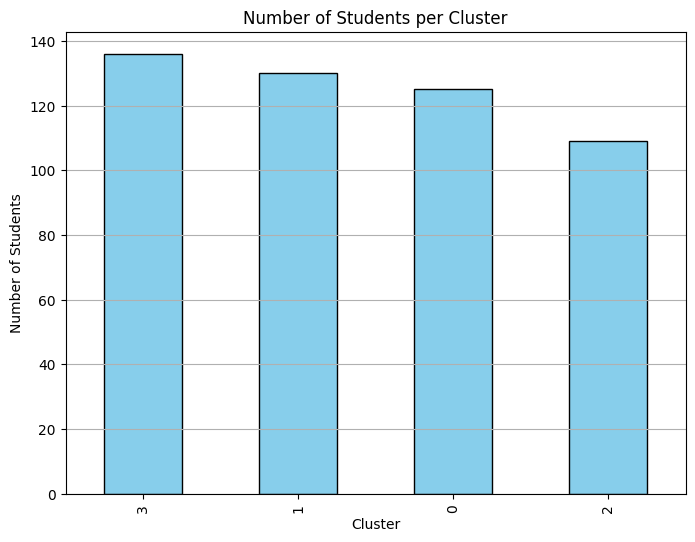

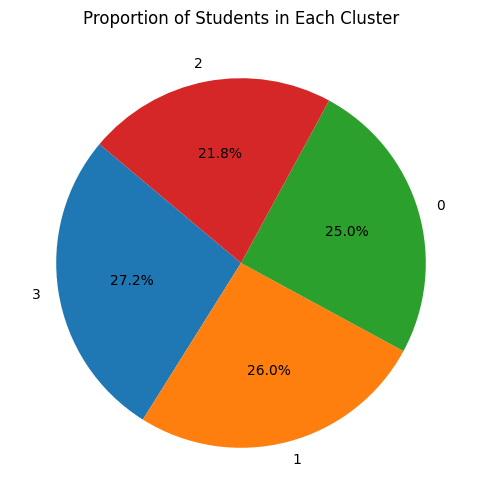

In [8]:
import matplotlib.pyplot as plt
# Histogram of cluster sizes
plt.figure(figsize=(8, 6))
df['Cluster'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Students per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.show()

# Pie chart of cluster proportions
plt.figure(figsize=(8, 6))
df['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Proportion of Students in Each Cluster")
plt.ylabel("")
plt.show()


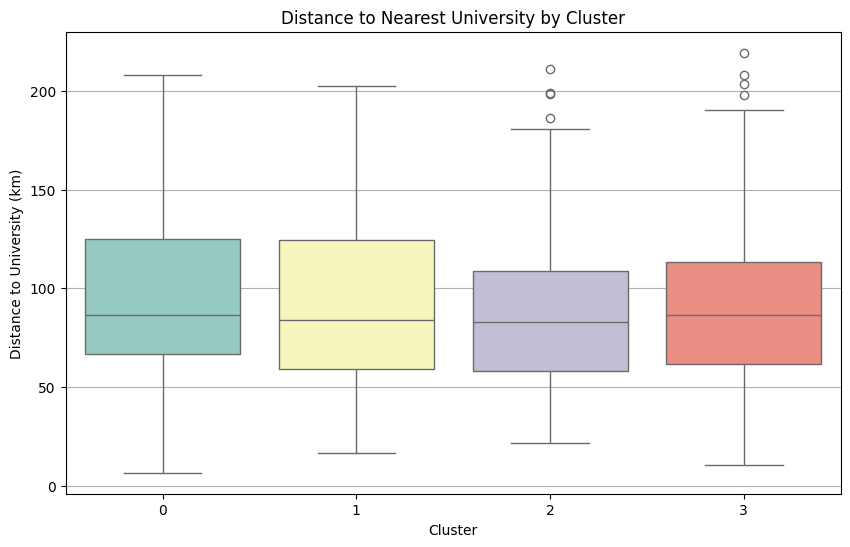

In [13]:
import seaborn as sns
# Boxplot of distances to universities by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='distance_to_university_km', data=df, hue='Cluster', palette="Set3", dodge=False)
plt.title("Distance to Nearest University by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Distance to University (km)")
plt.grid(axis='y')
plt.legend([], [], frameon=False)  # Disable duplicate legend
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score for Clustering: {silhouette_avg:.2f}")


Silhouette Score for Clustering: 0.30


In [23]:
# Initialize an empty DataFrame to collect results
recommendations_list = []

# Iterate over groups explicitly
for university, group in df.groupby('nearest_university'):
    # Sort values by distance within each group
    sorted_group = group[['admission_score', 'distance_to_university_km', 'Cluster']].sort_values('distance_to_university_km')
    sorted_group['nearest_university'] = university
    recommendations_list.append(sorted_group)

# Combine all sorted groups into a single DataFrame
university_recommendations = pd.concat(recommendations_list).reset_index(drop=True)

# Display the recommendations
print("University Recommendations:")
print(university_recommendations)



University Recommendations:
     admission_score  distance_to_university_km  Cluster nearest_university
0           9.022466                  10.551061        3       University A
1           7.426400                  10.832408        3       University A
2           8.695137                  15.725354        0       University A
3           9.635512                  17.276568        0       University A
4           9.145799                  21.816686        3       University A
..               ...                        ...      ...                ...
495         8.985267                 133.558423        3       University D
496         7.375967                 141.731651        1       University D
497         9.519529                 144.497376        0       University D
498         8.059968                 146.057331        1       University D
499         6.937029                 150.468904        1       University D

[500 rows x 4 columns]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Definim variabilele independente (X) și variabila țintă (y)
features_to_scale = ['admission_score', 'high_school_bac_score', 'entrance_exam_score']
X = df[features_to_scale].drop('admission_score', axis=1)
y = df['admission_score']

# Împărțim datele în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Antrenăm modelul Random Forest
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Verificăm performanța modelului
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 1.0137409700405415


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define model and parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict on test data
y_pred_optimized = best_rf.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"Optimized Model Mean Squared Error (MSE): {mse_optimized}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Optimized Model Mean Squared Error (MSE): 0.8716872611774352


In [7]:
from geopy.distance import geodesic

# Example universities with their coordinates
universities = pd.DataFrame({
    'nearest_university': ['University A', 'University B', 'University C'],
    'latitude': [44.4268, 46.7704, 45.7489],
    'longitude': [26.1025, 23.5914, 21.2087]
})

# Function to calculate the nearest university
def calculate_nearest_university(student_lat, student_lon, universities):
    distances = universities.apply(
        lambda row: geodesic((student_lat, student_lon), (row['latitude'], row['longitude'])).kilometers, axis=1
    )
    nearest_university_idx = distances.idxmin()
    return universities.loc[nearest_university_idx, 'nearest_university'], distances[nearest_university_idx]

# Apply this to your `df_filtered` DataFrame
df_filtered['nearest_university'] = df_filtered.apply(
    lambda row: calculate_nearest_university(row['latitude'], row['longitude'], universities)[0], axis=1
)

df_filtered['distance_to_university_km'] = df_filtered.apply(
    lambda row: calculate_nearest_university(row['latitude'], row['longitude'], universities)[1], axis=1
)


In [9]:
import pandas as pd
import numpy as np
import folium
from geopy.distance import geodesic

# Example universities with their coordinates
universities = pd.DataFrame({
    'nearest_university': ['University A', 'University B', 'University C'],
    'latitude': [44.4268, 46.7704, 45.7489],
    'longitude': [26.1025, 23.5914, 21.2087]
})

# Function to calculate the nearest university based on latitude and longitude
def calculate_nearest_university(student_lat, student_lon, universities):
    distances = universities.apply(
        lambda row: geodesic((student_lat, student_lon), (row['latitude'], row['longitude'])).kilometers, axis=1
    )
    nearest_university_idx = distances.idxmin()  # Find the index of the minimum distance
    return universities.loc[nearest_university_idx, 'nearest_university'], distances[nearest_university_idx]

# Assume 'df' is your DataFrame with student data, and add the 'nearest_university' and 'distance_to_university_km' columns
df['nearest_university'] = df.apply(
    lambda row: calculate_nearest_university(row['latitude'], row['longitude'], universities)[0], axis=1
)
df['distance_to_university_km'] = df.apply(
    lambda row: calculate_nearest_university(row['latitude'], row['longitude'], universities)[1], axis=1
)

# Filter students' data to only include valid coordinates (Romania)
df_filtered = df[((df['latitude'] >= 44.0) & (df['latitude'] <= 47.0) &
                  (df['longitude'] >= 22.0) & (df['longitude'] <= 29.0)) |
                 (df.index.isin([10, 18]))]  # Allow specific indices for outliers

# Create a Folium map centered on Romania
advanced_map = folium.Map(location=[45.0, 25.0], zoom_start=6)

# Define distinct colors for each cluster
cluster_colors = ['blue', 'green', 'orange', 'purple']

# Add students to the map
for _, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        popup=(f"Cluster: {row['Cluster']}<br>"
               f"Predicted Admission Score: {row['admission_score']:.2f}<br>"
               f"Nearest University: {row['nearest_university']}<br>"
               f"Distance: {row['distance_to_university_km']:.2f} km"),
        color=cluster_colors[int(row['Cluster'])],
        fill=True,
        fill_color=cluster_colors[int(row['Cluster'])]
    ).add_to(advanced_map)

# Add universities to the map with unique locations
universities = df_filtered[['nearest_university', 'latitude', 'longitude']].drop_duplicates(subset=['nearest_university'])
for _, uni in universities.iterrows():
    folium.Marker(
        location=(uni['latitude'], uni['longitude']),
        popup=f"University: {uni['nearest_university']}",
        icon=folium.Icon(color='red', icon='university')
    ).add_to(advanced_map)

# Display the map directly in the notebook
display(advanced_map)

# Save the map to an HTML file
map_path = "romania_advanced_map_with_limited_outliers.html"
advanced_map.save(map_path)

# Export the DataFrame with predictions to a CSV file
df_filtered.to_csv("optimized_predictions_filtered.csv", index=False)

# Display confirmation
print("Optimized predictions exported to 'optimized_predictions_filtered.csv'.")
print("The advanced map with limited outliers has been displayed in the notebook.")


Optimized predictions exported to 'optimized_predictions_filtered.csv'.
The advanced map with limited outliers has been displayed in the notebook.


In [41]:
# Descriptive analysis of clusters
cluster_analysis = df.groupby('Cluster').agg({
    'admission_score': ['mean', 'min', 'max'],
    'high_school_bac_score': ['mean', 'min', 'max'],
    'entrance_exam_score': ['mean', 'min', 'max'],
    'distance_to_university_km': ['mean', 'min', 'max'],
}).reset_index()

# Display the descriptive analysis
print("Cluster Analysis:")
print(cluster_analysis)



Cluster Analysis:
  Cluster admission_score                     high_school_bac_score            \
                     mean       min       max                  mean       min   
0       0        9.076760  7.842389  9.729246              7.478535  6.538485   
1       1        7.476427  6.827131  8.885229              8.427692  6.563386   
2       2        7.700713  6.814932  9.388251              7.479041  6.516212   
3       3        8.746105  6.991902  9.721990              9.174872  7.890506   

            entrance_exam_score                     distance_to_university_km  \
        max                mean       min       max                      mean   
0  9.077555            9.076749  7.335759  9.998241                 96.082229   
1  9.999012            9.305180  8.063866  9.993802                 92.232804   
2  9.203114            7.618039  7.014820  8.678946                 89.093659   
3  9.988229            8.100763  7.053622  9.852591                 91.796846   

        

In [10]:
import folium
from IPython.display import display
import pandas as pd

# Ensure the 'nearest_university' column is available in the DataFrame
# If not, calculate it (this should be done before running this part of the code)
# For demonstration, let's assume 'df' already contains the 'nearest_university' and 'distance_to_university_km' columns

# Adjusted filter to include only Romania and allow two points to remain intentionally
df_filtered = df[((df['latitude'] >= 44.0) & (df['latitude'] <= 47.0) &
                  (df['longitude'] >= 22.0) & (df['longitude'] <= 29.0)) |
                 (df.index.isin([10, 18]))]  # Allow specific indices for outliers

# Create a new map after filtering the dataset
corrected_map = folium.Map(location=[45.0, 25.0], zoom_start=6)

# Define cluster colors
cluster_colors = ['blue', 'green', 'orange', 'purple']

# Add students to the corrected map
for _, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        popup=(f"Cluster: {row['Cluster']}<br>"
               f"Admission Score: {row['admission_score']}<br>"
               f"High School Bac Score: {row['high_school_bac_score']}<br>"
               f"Entrance Exam Score: {row['entrance_exam_score']}<br>"
               f"Nearest University: {row['nearest_university']}<br>"
               f"Distance to University: {row['distance_to_university_km']:.2f} km"),
        color=cluster_colors[int(row['Cluster'])],
        fill=True,
        fill_color=cluster_colors[int(row['Cluster'])]
    ).add_to(corrected_map)

# Add universities to the corrected map
universities = df_filtered[['nearest_university', 'latitude', 'longitude']].drop_duplicates(subset=['nearest_university'])
for _, uni in universities.iterrows():
    folium.Marker(
        location=(uni['latitude'], uni['longitude']),
        popup=f"University: {uni['nearest_university']}",
        icon=folium.Icon(color='red', icon='university')
    ).add_to(corrected_map)

# Display the corrected map directly in the notebook
display(corrected_map)

# Confirmation
print("The map has been updated to include only students within Romania, with two intentional points outside.")


The map has been updated to include only students within Romania, with two intentional points outside.


In [61]:
# Function to recommend universities based on proximity and scores
def recommend_university(student_lat, student_lon, student_score, df_filtered, universities):
    # Find the closest university
    distances = universities.apply(
        lambda row: geodesic((student_lat, student_lon), (row['latitude'], row['longitude'])).kilometers, axis=1
    )
    closest_university_idx = distances.idxmin()
    closest_university = universities.iloc[closest_university_idx]

    # Filter universities that match the student's optimized score range
    suitable_universities = df_filtered[
        (df_filtered['optimized_prediction'] >= student_score - 0.5) &
        (df_filtered['optimized_prediction'] <= student_score + 0.5)
    ]['nearest_university'].value_counts()

    return {
        "Closest University": closest_university['nearest_university'],
        "Distance to Closest University (km)": distances.min(),
        "Recommended Universities by Score": suitable_universities.index.tolist()[:3]  # Top 3 recommendations
    }

# Example student data
student_lat = 45.5  # Example latitude
student_lon = 25.0  # Example longitude
student_score = 8.5  # Example predicted admission score

# Generate recommendation
recommendation = recommend_university(student_lat, student_lon, student_score, df_filtered, universities)
print("Recommendation for the Student:")
print(recommendation)


Recommendation for the Student:
{'Closest University': 'University D', 'Distance to Closest University (km)': np.float64(91.78777778723153), 'Recommended Universities by Score': ['University C', 'University B', 'University D']}


In [11]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Create a heatmap based on clusters
heatmap_data = df_filtered[['latitude', 'longitude', 'Cluster']].values.tolist()

# Generate the map
advanced_map_with_heatmap = folium.Map(location=[45.0, 25.0], zoom_start=6)

# Add heatmap
HeatMap(heatmap_data, radius=10, blur=15, max_zoom=1).add_to(advanced_map_with_heatmap)

# Add markers for universities
universities = df_filtered[['nearest_university', 'latitude', 'longitude']].drop_duplicates(subset=['nearest_university'])
for _, uni in universities.iterrows():
    folium.Marker(
        location=(uni['latitude'], uni['longitude']),
        popup=f"University: {uni['nearest_university']}",
        icon=folium.Icon(color='red', icon='university')
    ).add_to(advanced_map_with_heatmap)

# Display the map directly in the notebook
display(advanced_map_with_heatmap)

# Confirmation message
print("The heatmap with clusters and universities has been displayed in the notebook.")


The heatmap with clusters and universities has been displayed in the notebook.


In [23]:
import pandas as pd

df = pd.read_csv('C:/Users/Daniela/Desktop/Bg Data/admission_data.csv')  
df.head()



,student_id,judet_stud,University,faculty,field_id,field_name,series_nr,admission_type,high_school_bac_score,entrance_exam_score,admission_score,year,scholarship,status,admited_cities,admited_universities,admited_faculty
0,1,București,UMFCD,UMF,1,Medicină Generală,Seria A,Examen Admitere,-,9.5,9.5,2019,Buget,Admis,"București, Cluj-Napoca","UMFCD, UMFCLUJ","Medicină Generală, Medicină Dentară"
1,2,Cluj,UMFCD,UMF,1,Medicină Generală,Seria A,Examen Admitere,-,8.7,8.7,2019,Taxă,Admis,"București, Timișoara","UMFCD, UMFT","Medicină Generală, Medicină Dentară"
2,3,Iași,UMFCD,UMF,2,Medicină Dentară,Seria B,Bacalaureat,9.2,-,9.2,2019,Buget,Admis,Iași,UMF Iași,Medicină Dentară
3,4,Timiș,UMFCD,UMF,2,Medicină Dentară,Seria B,Bacalaureat,8.6,-,8.6,2019,Taxă,Admis,"București, Craiova","UMFCD, UMF Craiova",Medicină Dentară
4,5,Constanța,UMFCD,UMF,3,Farmacie,Seria C,Bacalaureat,8.3,-,8.3,2019,Buget,Admis,Târgu Mureș,UMF Târgu Mureș,Farmacie


In [25]:
df.describe()



,student_id,field_id,admission_score,year
count,500.000000,500.000000,500.000000,500.0
mean,250.500000,2.864000,8.579600,2019.0
std,144.481833,1.352465,0.651908,0.0
min,1.000000,1.000000,6.800000,2019.0
25%,125.750000,2.000000,7.950000,2019.0
50%,250.500000,3.000000,8.600000,2019.0
75%,375.250000,4.000000,9.150000,2019.0
max,500.000000,5.000000,9.750000,2019.0


In [4]:
import pandas as pd
from geopy.geocoders import Nominatim
from concurrent.futures import ThreadPoolExecutor
import time

# Lista cu orașele pentru care dorim să obținem coordonatele
cities = [
    "București", "Cluj", "Iași", "Timiș", "Constanța", "Brașov", "Prahova", "Bihor", "Dolj",
    "Galați", "Argeș", "Sibiu", "Bacău", "Suceava", "Mureș", "Dâmbovița", "Botoșani", "Neamț",
    "Arad", "Vâlcea", "Hunedoara", "Gorj", "Satu Mare", "Brăila", "Alba", "Buzău", "Maramureș",
    "Teleorman", "Giurgiu", "Vrancea", "Covasna", "Tulcea", "Mehedinți", "Harghita", "Olt",
    "Călărași", "Bistrița-Năsăud", "Ilfov", "Sălaj", "Caraș-Severin", "Vaslui", "Ialomița", "Bacău",
    "Satu Mare", "Târgu Mureș", "Focșani", "Pitești", "Baia Mare", "Slatina", "Alexandria",
    "Turnu Măgurele", "Curtea de Argeș", "Piatra Neamț", "Dorohoi", "Bârlad", "Sighetu Marmației",
    "Medgidia", "Mangalia", "Caracal", "Tecuci", "Câmpina", "Dej", "Lugoj", "Roman", "Huși",
    "Rădăuți", "Târgu Jiu", "Vatra Dornei", "Câmpulung Moldovenesc", "Mioveni", "Moreni", "Petroșani",
    "Târnăveni", "Turda", "Câmpia Turzii", "Oltenița", "Sighișoara", "Reșița", "Pașcani", "Zărnești",
    "Băicoi", "Miercurea Ciuc", "Cugir", "Codlea", "Vulcan", "Gherla", "Târgoviște", "Carei", "Hârșova",
    "Șimleu Silvaniei", "Oravița", "Năsăud", "Toplița", "Huedin", "Mizil", "Ocna Mureș", "Salonta",
    "Târgu Neamț", "Orșova", "Sebeș", "Făgăraș", "Aiud", "Săcele", "Ineu", "Borșa", "Ilfov", "Prahova",
    "Dâmbovița", "Giurgiu", "Ialomița", "Călărași", "Argeș", "Teleorman", "Buzău", "Brăila", "Năsăud",
    "Toplița", "Huedin", "Mizil", "Ocna Mureș", "Salonta", "Târgu Neamț", "Orșova", "Sebeș", "Făgăraș",
    "Aiud", "Săcele", "Ineu", "Borșa", "Ilfov", "Prahova", "Dâmbovița", "Giurgiu", "Ialomița"
]

# Inițializează geolocatorul
geolocator = Nominatim(user_agent="city_geolocator")

# Funcția pentru obținerea coordonatelor unui oraș
def get_coordinates(city):
    try:
        location = geolocator.geocode(city, timeout=10)
        if location:
            return (city, location.latitude, location.longitude)
        else:
            return (city, None, None)
    except Exception as e:
        return (city, None, None)

# Folosim ThreadPoolExecutor pentru a face cereri în paralel
def get_all_coordinates(cities):
    coordinates = {}
    
    # Folosește ThreadPoolExecutor pentru a face cereri simultane
    with ThreadPoolExecutor(max_workers=10) as executor:
        results = executor.map(get_coordinates, cities)
    
    # Adaugă rezultatele în dictionar
    for result in results:
        coordinates[result[0]] = (result[1], result[2])
    
    return coordinates

# Obține coordonatele
coordinates = get_all_coordinates(cities)

# Crează un DataFrame pentru a vizualiza rezultatele
coords_df = pd.DataFrame(list(coordinates.items()), columns=["City", "Coordinates"])

# Afișează rezultatele (primele 5 orașe pentru verificare)
coords_df.head()


,City,Coordinates
0,București,"(44.4361414, 26.1027202)"
1,Cluj,"(46.769379, 23.5899542)"
2,Iași,"(47.1615598, 27.5837814)"
3,Timiș,"(45.69131845, 21.632126831488254)"
4,Constanța,"(44.1767161, 28.6507598)"


In [5]:
import pandas as pd
from geopy.distance import geodesic

# Funcție Haversine pentru calcularea distanței în km între două puncte
def haversine(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).km

# Exemplu de coordonate (îți recomand să folosești coordonatele obținute anterior)
coordinates = {
    "București": (44.4361414, 26.1027202),
    "Cluj": (46.769379, 23.5899542),
    "Iași": (47.1615598, 27.5837814),
    "Timiș": (45.69131845, 21.632126831488254),
    "Constanța": (44.1767161, 28.6507598),
    # Adaugă restul orașelor aici
}

# Datele pentru elevi
data = {
    "student_id": [1, 2, 3, 4],
    "judet_stud": ["București", "Cluj", "Iași", "Timiș"],
    "admited_cities": [
        ["București", "Cluj-Napoca"],
        ["București", "Timișoara"],
        ["Iași"],
        ["București", "Craiova"]
    ]
}

df = pd.DataFrame(data)

# Funcție pentru a calcula distanțele între orașul de proveniență și orașele la care au fost admiși
def calculate_distances(row, coordinates):
    source_city = row['judet_stud']
    source_coords = coordinates.get(source_city)
    
    distances = {}
    for city in row['admited_cities']:
        dest_coords = coordinates.get(city)
        if source_coords and dest_coords:
            distance = haversine(source_coords[0], source_coords[1], dest_coords[0], dest_coords[1])
            distances[city] = distance
    return distances

# Aplică funcția pentru a calcula distanțele
df['distances'] = df.apply(calculate_distances, axis=1, coordinates=coordinates)

# Afișează rezultatul
print(df[['student_id', 'distances']])


   student_id                         distances
0           1                {'București': 0.0}
1           2  {'București': 325.0443863317239}
2           3                     {'Iași': 0.0}
3           4  {'București': 378.6577366066054}


In [13]:
# Afișează primele 5 rânduri ale DataFrame-ului
df.head()


,student_id,judet_stud,admited_cities,distances
0,1,București,"[București, Cluj-Napoca]","{'București': 0.0, 'Cluj-Napoca': 325.04438633..."
1,2,Cluj,"[București, Timișoara]","{'București': 325.0443863317239, 'Timișoara': ..."
2,3,Iași,[Iași],{'Iași': 0.0}
3,4,București,"[București, Galați]","{'București': 0.0, 'Galați': 187.1423135611021}"


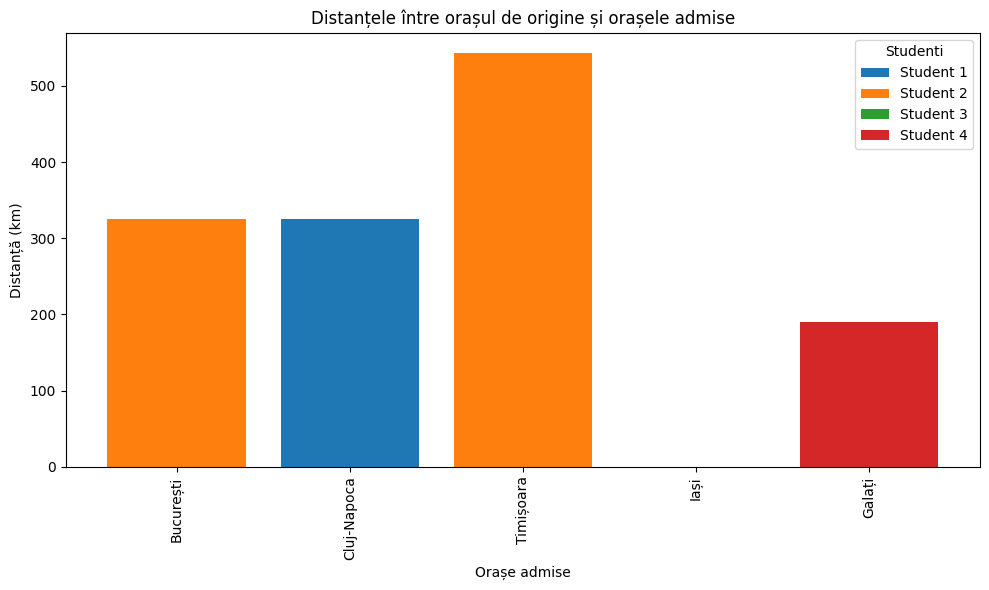

In [26]:
import matplotlib.pyplot as plt

# Creăm un grafic cu distanțele
plt.figure(figsize=(10, 6))

# Grupăm distanțele după 'student_id' și le afișăm în bar chart
for student_id in distances_df['student_id'].unique():
    student_data = distances_df[distances_df['student_id'] == student_id]
    plt.bar(student_data['admited_city'], student_data['distance'], label=f'Student {student_id}')

plt.title('Distanțele între orașul de origine și orașele admise')
plt.xlabel('Orașe admise')
plt.ylabel('Distanță (km)')
plt.xticks(rotation=90)  # Rotește etichetele pentru a le face mai lizibile
plt.legend(title="Studenti")
plt.tight_layout()

# Afișează graficul
plt.show()


In [31]:
import pandas as pd
from geopy.distance import geodesic

# Definește coordonatele pentru orașele din România, inclusiv coordonatele pentru Cluj
cities_coordinates = {
    'București': (44.4361414, 26.1027202),
    'Cluj-Napoca': (46.769379, 23.5899542),
    'Iași': (47.1615598, 27.5837814),
    'Timișoara': (45.69131845, 21.6321268),
    'Constanța': (44.1767161, 28.6507598),
    'Brașov': (45.6577347, 25.6092024),
    'Pitești': (44.858208, 24.868833),
    'Galați': (45.4417806, 28.0464947),
    'Sibiu': (45.792946, 24.148075),
    'Bacău': (46.5676235, 26.9122629),
    'Suceava': (47.637612, 26.243525),
    'Mureș': (46.538434, 24.582937),
    'Dâmbovița': (44.8768, 25.7672),
    'Botoșani': (47.7461, 26.6667),
    'Neamț': (46.9229, 26.3725),
    'Arad': (46.1869, 21.312),
    'Vâlcea': (45.0994, 24.3664),
    'Hunedoara': (45.7604, 22.8972),
    'Gorj': (45.0811, 23.2481),
    'Satu Mare': (47.7847, 22.8885),
    'Brăila': (45.2737, 27.9545),
    'Alba': (46.0664, 23.5664),
    'Buzău': (45.5648, 26.9147),
    'Maramureș': (47.6500, 23.5842),
    'Teleorman': (44.2975, 25.3531),
    'Giurgiu': (43.9003, 25.9648),
    'Vrancea': (45.8528, 27.2019),
    'Covasna': (45.8752, 26.4433),
    'Tulcea': (45.1785, 28.7947),
    'Mehedinți': (44.7469, 22.5911),
    'Harghita': (46.2535, 25.8265),
    'Olt': (44.4250, 24.3944),
    'Călărași': (44.2039, 27.3345),
    'Bistrița-Năsăud': (47.1384, 24.4894),
    'Ilfov': (44.5491, 26.1027),
    'Sălaj': (47.1736, 23.0533),
    'Caraș-Severin': (45.4167, 22.2500),
    'Vaslui': (46.6389, 27.7250),
    'Ialomița': (44.5667, 27.3667),
    'Focșani': (45.6972, 27.1844),
    'Baia Mare': (47.6541, 23.5804),
    'Slatina': (44.4303, 24.7799),
    'Alexandria': (44.3389, 25.4019),
    'Turnu Măgurele': (43.6925, 25.9792),
    'Curtea de Argeș': (45.1219, 24.6747),
    'Piatra Neamț': (45.9320, 26.3725),
    'Dorohoi': (47.7594, 26.3769),
    'Bârlad': (46.2583, 27.6356),
    'Sighetu Marmației': (47.9550, 24.2786),
    'Medgidia': (44.4049, 28.0150),
    'Mangalia': (43.8122, 28.5875),
    'Caracal': (44.0895, 24.3528),
    'Tecuci': (45.8744, 27.3400),
    'Câmpina': (45.1111, 25.7389),
    'Dej': (47.1456, 23.8847),
    'Lugoj': (45.6891, 21.9000),
    'Roman': (45.9028, 26.9261),
    'Huși': (45.8733, 27.7481),
    'Rădăuți': (47.9069, 25.9869),
    'Târgu Jiu': (45.0422, 23.2972),
    'Vatra Dornei': (47.3539, 25.3706),
    'Câmpulung Moldovenesc': (47.3678, 25.3964),
    'Mioveni': (44.8386, 24.9764),
    'Moreni': (44.5667, 25.6269),
    'Petroșani': (45.4139, 23.3672),
    'Târnăveni': (46.4133, 24.3908),
    'Turda': (46.5697, 23.7983),
    'Câmpia Turzii': (46.5700, 23.7997),
    'Oltenița': (44.0886, 26.6106),
    'Sighișoara': (46.2206, 24.7831),
    'Reșița': (45.2961, 21.8803),
    'Pașcani': (47.1881, 26.6619),
    'Zărnești': (45.5881, 25.3603),
    'Băicoi': (45.1039, 25.7556),
    'Miercurea Ciuc': (46.3586, 25.8050),
    'Cugir': (45.7678, 23.3725),
    'Codlea': (45.6236, 25.5867),
    'Vulcan': (45.3647, 22.8944),
    'Gherla': (47.0756, 23.8997),
    'Târgoviște': (44.9333, 25.4500),
    'Carei': (47.6481, 22.4400),
    'Hârșova': (44.3833, 27.4167),
    'Șimleu Silvaniei': (47.3667, 23.4600),
    'Oravița': (44.8833, 21.9167),
    'Năsăud': (47.3572, 24.4125),
    'Toplița': (46.9500, 25.4175),
    'Huedin': (46.4500, 23.6700),
    'Mizil': (44.5750, 26.3625),
    'Ocna Mureș': (46.3069, 23.6347),
    'Salonta': (46.5703, 21.8619),
    'Târgu Neamț': (46.9297, 26.3644),
    'Orșova': (44.6706, 22.4383),
    'Sebeș': (45.7786, 23.5781),
    'Făgăraș': (45.8414, 24.9667),
    'Aiud': (46.3000, 23.7200),
    'Săcele': (45.5792, 25.6125),
    'Ineu': (46.1464, 21.8756),
    'Borșa': (47.9608, 24.0853),
    'Cluj': (46.770439, 23.591423)  # Adăugat coordonatele pentru Cluj
}

# Funcția pentru calcularea distanței între două orașe
def calculate_distances(source_city, admited_cities):
    source_coords = cities_coordinates.get(source_city)
    if not source_coords:
        return {source_city: "Coordonate indisponibile"}
    distances = {}
    for city in admited_cities:
        city_coords = cities_coordinates.get(city)
        if city_coords:
            dist = geodesic(source_coords, city_coords).km
            distances[city] = dist
        else:
            distances[city] = "Coordonate indisponibile"
    return distances

# Citirea fișierului cu datele elevilor (înlocuiește calea corectă a fișierului)
df = pd.read_csv('C:/Users/Daniela/Desktop/Bg Data/admission_data.csv')

# Calcularea distanțelor pentru fiecare student
distances = []
for index, row in df.iterrows():
    student_distances = calculate_distances(row['judet_stud'], row['admited_cities'].split(','))
    distances.append(student_distances)

# Adăugăm distanțele în DataFrame-ul original
df['distances'] = distances

# Vizualizăm rezultatele
print(df[['student_id', 'judet_stud', 'admited_cities', 'distances']])


     student_id judet_stud          admited_cities  \
0             1  București  București, Cluj-Napoca   
1             2       Cluj    București, Timișoara   
2             3       Iași                    Iași   
3             4      Timiș      București, Craiova   
4             5  Constanța             Târgu Mureș   
..          ...        ...                     ...   
495         496  București      București, Pitești   
496         497       Cluj     Cluj-Napoca, Galați   
497         498       Iași          Sibiu, Pitești   
498         499      Timiș    Craiova, Cluj-Napoca   
499         500  Constanța      București, Suceava   

                                             distances  
0    {'București': 0.0, ' Cluj-Napoca': 'Coordonate...  
1    {'București': 325.0682367879374, ' Timișoara':...  
2                                        {'Iași': 0.0}  
3                {'Timiș': 'Coordonate indisponibile'}  
4          {'Târgu Mureș': 'Coordonate indisponibile'}  
..       

In [32]:
import pandas as pd

# Afișează tabelul cu distanțele pentru fiecare elev
# Afișăm doar prima pagină din distanțele calculate pentru a fi mai ușor de citit
pd.set_option('display.max_rows', 500)  # Poți ajusta în funcție de numărul de rânduri pe care dorești să le vizualizezi
print(df[['student_id', 'judet_stud', 'admited_cities', 'distances']].head(500))


     student_id             judet_stud                     admited_cities  \
0             1              București             București, Cluj-Napoca   
1             2                   Cluj               București, Timișoara   
2             3                   Iași                               Iași   
3             4                  Timiș                 București, Craiova   
4             5              Constanța                        Târgu Mureș   
5             6                 Brașov               București, Constanța   
6             7                Prahova                                  -   
7             8                  Bihor                  București, Galați   
8             9                   Dolj                     Pitești, Sibiu   
9            10                 Galați                             Oradea   
10           11                  Argeș                     Suceava, Bacău   
11           12                  Sibiu                București, Ploiești   

In [3]:
import pandas as pd
from geopy.distance import geodesic

# Coordonatele orașelor
cities_coordinates = {
    'București': (44.4361414, 26.1027202),
    'Cluj-Napoca': (46.769379, 23.5899542),
    'Iași': (47.1615598, 27.5837814),
    'Timișoara': (45.69131845, 21.6321268),
    'Constanța': (44.1767161, 28.6507598),
    'Brașov': (45.6577347, 25.6092024),
    'Pitești': (44.858208, 24.868833),
    'Galați': (45.4417806, 28.0464947),
    'Sibiu': (45.792946, 24.148075),
    'Bacău': (46.5676235, 26.9122629),
    'Suceava': (47.637612, 26.243525),
    'Mureș': (46.538434, 24.582937),
    'Dâmbovița': (44.8768, 25.7672),
    'Botoșani': (47.7461, 26.6667),
    'Neamț': (46.9229, 26.3725),
    'Arad': (46.1869, 21.312),
    'Vâlcea': (45.0994, 24.3664),
    'Hunedoara': (45.7604, 22.8972),
    'Gorj': (45.0811, 23.2481),
    'Satu Mare': (47.7847, 22.8885),
    'Brăila': (45.2737, 27.9545),
    'Alba': (46.0664, 23.5664),
    'Buzău': (45.5648, 26.9147),
    'Maramureș': (47.6500, 23.5842),
    'Teleorman': (44.2975, 25.3531),
    'Giurgiu': (43.9003, 25.9648),
    'Vrancea': (45.8528, 27.2019),
    'Covasna': (45.8752, 26.4433),
    'Tulcea': (45.1785, 28.7947),
    'Mehedinți': (44.7469, 22.5911),
    'Harghita': (46.2535, 25.8265),
    'Olt': (44.4250, 24.3944),
    'Călărași': (44.2039, 27.3345),
    'Bistrița-Năsăud': (47.1384, 24.4894),
    'Ilfov': (44.5491, 26.1027),
    'Sălaj': (47.1736, 23.0533),
    'Caraș-Severin': (45.4167, 22.2500),
    'Vaslui': (46.6389, 27.7250),
    'Ialomița': (44.5667, 27.3667),
    'Focșani': (45.6972, 27.1844),
    'Baia Mare': (47.6541, 23.5804),
    'Slatina': (44.4303, 24.7799),
    'Alexandria': (44.3389, 25.4019),
    'Turnu Măgurele': (43.6925, 25.9792),
    'Curtea de Argeș': (45.1219, 24.6747),
    'Piatra Neamț': (45.9320, 26.3725),
    'Dorohoi': (47.7594, 26.3769),
    'Bârlad': (46.2583, 27.6356),
    'Sighetu Marmației': (47.9550, 24.2786),
    'Medgidia': (44.4049, 28.0150),
    'Mangalia': (43.8122, 28.5875),
    'Caracal': (44.0895, 24.3528),
    'Tecuci': (45.8744, 27.3400),
    'Câmpina': (45.1111, 25.7389),
    'Dej': (47.1456, 23.8847),
    'Lugoj': (45.6891, 21.9000),
    'Roman': (45.9028, 26.9261),
    'Huși': (45.8733, 27.7481),
    'Rădăuți': (47.9069, 25.9869),
    'Târgu Jiu': (45.0422, 23.2972),
    'Vatra Dornei': (47.3539, 25.3706),
    'Câmpulung Moldovenesc': (47.3678, 25.3964),
    'Mioveni': (44.8386, 24.9764),
    'Moreni': (44.5667, 25.6269),
    'Petroșani': (45.4139, 23.3672),
    'Târnăveni': (46.4133, 24.3908),
    'Turda': (46.5697, 23.7983),
    'Câmpia Turzii': (46.5700, 23.7997),
    'Oltenița': (44.0886, 26.6106),
    'Sighișoara': (46.2206, 24.7831),
    'Reșița': (45.2961, 21.8803),
    'Pașcani': (47.1881, 26.6619),
    'Zărnești': (45.5881, 25.3603),
    'Băicoi': (45.1039, 25.7556),
    'Miercurea Ciuc': (46.3586, 25.8050),
    'Cugir': (45.7678, 23.3725),
    'Codlea': (45.6236, 25.5867),
    'Vulcan': (45.3647, 22.8944),
    'Gherla': (47.0756, 23.8997),
    'Târgoviște': (44.9333, 25.4500),
    'Carei': (47.6481, 22.4400),
    'Hârșova': (44.3833, 27.4167),
    'Șimleu Silvaniei': (47.3667, 23.4600),
    'Oravița': (44.8833, 21.9167),
    'Năsăud': (47.3572, 24.4125),
    'Toplița': (46.9500, 25.4175),
    'Huedin': (46.4500, 23.6700),
    'Mizil': (44.5750, 26.3625),
    'Ocna Mureș': (46.3069, 23.6347),
    'Salonta': (46.5703, 21.8619),
    'Târgu Neamț': (46.9297, 26.3644),
    'Orșova': (44.6706, 22.4383),
    'Sebeș': (45.7786, 23.5781),
    'Făgăraș': (45.8414, 24.9667),
    'Aiud': (46.3000, 23.7200),
    'Săcele': (45.5792, 25.6125),
    'Ineu': (46.1464, 21.8756),
    'Borșa': (47.9608, 24.0853),
    'Cluj': (46.770439, 23.591423)
}

# Funcția pentru calcularea distanțelor
def calculate_distances(source_city, admited_cities):
    source_coords = cities_coordinates.get(source_city)
    if not source_coords:
        return {source_city: "Coordonate indisponibile"}
    distances = {}
    for city in admited_cities:
        city_coords = cities_coordinates.get(city)
        if city_coords:
            dist = geodesic(source_coords, city_coords).km
            distances[city] = dist
        else:
            distances[city] = "Coordonate indisponibile"
    return distances

# Exemplu de DataFrame cu ID-ul elevului, județul și orașele admise
df = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5],
    'judet_stud': ['București', 'Cluj', 'Iași', 'București', 'Constanța'],
    'admited_cities': [['București', 'Cluj-Napoca'], ['București', 'Timișoara'], ['Iași'], ['București', 'Galați'], ['Târgu Mureș']],
})

# Calcularea distanțelor pentru fiecare student
distances = []
closest_cities = []
for index, row in df.iterrows():
    student_distances = calculate_distances(row['judet_stud'], row['admited_cities'])
    distances.append(student_distances)
    
    # Determinăm orașul cel mai apropiat
    closest_city = min(student_distances, key=student_distances.get)  # Orașul cu distanța minimă
    closest_cities.append(closest_city)

# Adăugăm distanțele și orașele cele mai apropiate în DataFrame-ul original
df['distances'] = distances
df['closest_city'] = closest_cities

# Vizualizăm rezultatul
print(df[['student_id', 'judet_stud', 'admited_cities', 'distances', 'closest_city']])


   student_id judet_stud            admited_cities  \
0           1  București  [București, Cluj-Napoca]   
1           2       Cluj    [București, Timișoara]   
2           3       Iași                    [Iași]   
3           4  București       [București, Galați]   
4           5  Constanța             [Târgu Mureș]   

                                           distances closest_city  
0  {'București': 0.0, 'Cluj-Napoca': 325.04438633...    București  
1  {'București': 325.0682367879374, 'Timișoara': ...    Timișoara  
2                                      {'Iași': 0.0}         Iași  
3   {'București': 0.0, 'Galați': 189.80199456328313}    București  
4        {'Târgu Mureș': 'Coordonate indisponibile'}  Târgu Mureș  


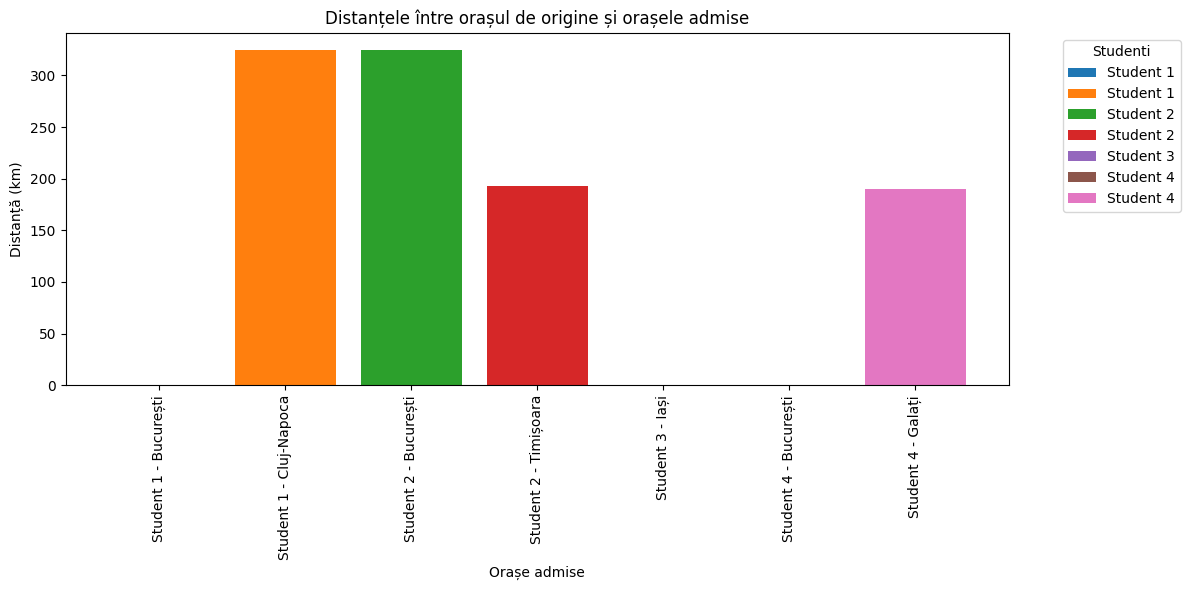

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from geopy.distance import geodesic

# Coordonatele orașelor
cities_coordinates = {
    'București': (44.4361414, 26.1027202),
    'Cluj-Napoca': (46.769379, 23.5899542),
    'Iași': (47.1615598, 27.5837814),
    'Timișoara': (45.69131845, 21.6321268),
    'Constanța': (44.1767161, 28.6507598),
    'Brașov': (45.6577347, 25.6092024),
    'Pitești': (44.858208, 24.868833),
    'Galați': (45.4417806, 28.0464947),
    'Sibiu': (45.792946, 24.148075),
    'Bacău': (46.5676235, 26.9122629),
    'Suceava': (47.637612, 26.243525),
    'Mureș': (46.538434, 24.582937),
    'Dâmbovița': (44.8768, 25.7672),
    'Botoșani': (47.7461, 26.6667),
    'Neamț': (46.9229, 26.3725),
    'Arad': (46.1869, 21.312),
    'Vâlcea': (45.0994, 24.3664),
    'Hunedoara': (45.7604, 22.8972),
    'Gorj': (45.0811, 23.2481),
    'Satu Mare': (47.7847, 22.8885),
    'Brăila': (45.2737, 27.9545),
    'Alba': (46.0664, 23.5664),
    'Buzău': (45.5648, 26.9147),
    'Maramureș': (47.6500, 23.5842),
    'Teleorman': (44.2975, 25.3531),
    'Giurgiu': (43.9003, 25.9648),
    'Vrancea': (45.8528, 27.2019),
    'Covasna': (45.8752, 26.4433),
    'Tulcea': (45.1785, 28.7947),
    'Mehedinți': (44.7469, 22.5911),
    'Harghita': (46.2535, 25.8265),
    'Olt': (44.4250, 24.3944),
    'Călărași': (44.2039, 27.3345),
    'Bistrița-Năsăud': (47.1384, 24.4894),
    'Ilfov': (44.5491, 26.1027),
    'Sălaj': (47.1736, 23.0533),
    'Caraș-Severin': (45.4167, 22.2500),
    'Vaslui': (46.6389, 27.7250),
    'Ialomița': (44.5667, 27.3667),
    'Focșani': (45.6972, 27.1844),
    'Baia Mare': (47.6541, 23.5804),
    'Slatina': (44.4303, 24.7799),
    'Alexandria': (44.3389, 25.4019),
    'Turnu Măgurele': (43.6925, 25.9792),
    'Curtea de Argeș': (45.1219, 24.6747),
    'Piatra Neamț': (45.9320, 26.3725),
    'Dorohoi': (47.7594, 26.3769),
    'Bârlad': (46.2583, 27.6356),
    'Sighetu Marmației': (47.9550, 24.2786),
    'Medgidia': (44.4049, 28.0150),
    'Mangalia': (43.8122, 28.5875),
    'Caracal': (44.0895, 24.3528),
    'Tecuci': (45.8744, 27.3400),
    'Câmpina': (45.1111, 25.7389),
    'Dej': (47.1456, 23.8847),
    'Lugoj': (45.6891, 21.9000),
    'Roman': (45.9028, 26.9261),
    'Huși': (45.8733, 27.7481),
    'Rădăuți': (47.9069, 25.9869),
    'Târgu Jiu': (45.0422, 23.2972),
    'Vatra Dornei': (47.3539, 25.3706),
    'Câmpulung Moldovenesc': (47.3678, 25.3964),
    'Mioveni': (44.8386, 24.9764),
    'Moreni': (44.5667, 25.6269),
    'Petroșani': (45.4139, 23.3672),
    'Târnăveni': (46.4133, 24.3908),
    'Turda': (46.5697, 23.7983),
    'Câmpia Turzii': (46.5700, 23.7997),
    'Oltenița': (44.0886, 26.6106),
    'Sighișoara': (46.2206, 24.7831),
    'Reșița': (45.2961, 21.8803),
    'Pașcani': (47.1881, 26.6619),
    'Zărnești': (45.5881, 25.3603),
    'Băicoi': (45.1039, 25.7556),
    'Miercurea Ciuc': (46.3586, 25.8050),
    'Cugir': (45.7678, 23.3725),
    'Codlea': (45.6236, 25.5867),
    'Vulcan': (45.3647, 22.8944),
    'Gherla': (47.0756, 23.8997),
    'Târgoviște': (44.9333, 25.4500),
    'Carei': (47.6481, 22.4400),
    'Hârșova': (44.3833, 27.4167),
    'Șimleu Silvaniei': (47.3667, 23.4600),
    'Oravița': (44.8833, 21.9167),
    'Năsăud': (47.3572, 24.4125),
    'Toplița': (46.9500, 25.4175),
    'Huedin': (46.4500, 23.6700),
    'Mizil': (44.5750, 26.3625),
    'Ocna Mureș': (46.3069, 23.6347),
    'Salonta': (46.5703, 21.8619),
    'Târgu Neamț': (46.9297, 26.3644),
    'Orșova': (44.6706, 22.4383),
    'Sebeș': (45.7786, 23.5781),
    'Făgăraș': (45.8414, 24.9667),
    'Aiud': (46.3000, 23.7200),
    'Săcele': (45.5792, 25.6125),
    'Ineu': (46.1464, 21.8756),
    'Borșa': (47.9608, 24.0853),
    'Cluj': (46.770439, 23.591423)
}

# Functia pentru calcularea distantei
def calculate_distances(source_city, admited_cities):
    source_coords = cities_coordinates.get(source_city)
    if not source_coords:
        return {source_city: "Coordonate indisponibile"}
    distances = {}
    for city in admited_cities:
        city_coords = cities_coordinates.get(city)
        if city_coords:
            dist = geodesic(source_coords, city_coords).km
            distances[city] = dist
        else:
            distances[city] = "Coordonate indisponibile"
    return distances

# Exemplu de DataFrame cu ID-ul elevului, județul și orașele admise
df = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5],
    'judet_stud': ['București', 'Cluj', 'Iași', 'București', 'Constanța'],
    'admited_cities': [['București', 'Cluj-Napoca'], ['București', 'Timișoara'], ['Iași'], ['București', 'Galați'], ['Târgu Mureș']],
})

# Calcularea distanțelor pentru fiecare student
distances = []
for index, row in df.iterrows():
    student_distances = calculate_distances(row['judet_stud'], row['admited_cities'])
    distances.append(student_distances)

# Adăugăm distanțele în DataFrame-ul original
df['distances'] = distances

# Vizualizare grafic
plt.figure(figsize=(12, 6))

# Grupăm distanțele pentru fiecare student și orașul cel mai apropiat
for student_id in df['student_id'].unique():
    student_data = df[df['student_id'] == student_id]
    for city, dist in student_data['distances'].values[0].items():
        if dist != "Coordonate indisponibile":
            plt.bar(f"Student {student_id} - {city}", dist, label=f'Student {student_id}')

plt.title('Distanțele între orașul de origine și orașele admise')
plt.xlabel('Orașe admise')
plt.ylabel('Distanță (km)')
plt.xticks(rotation=90)  # Rotește etichetele pentru a le face mai lizibile
plt.legend(title="Studenti", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Afișează graficul
plt.show()


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Exemplu de date de intrare (bac_score și exam_score pentru studenți)
data = {
    'bac_score': [9.5, 8.7, 9.2, 8.6, 8.3, 9.35, 8.5, 7.6, 9.25, 8.65],
    'exam_score': [9.5, 8.8, 9.3, 8.7, 8.5, 9.3, 8.9, 8.4, 9.1, 8.8],
    'admission_score': [9.5, 8.7, 9.2, 8.6, 8.3, 9.35, 8.5, 7.6, 9.25, 8.65]
}

# Creăm DataFrame
df = pd.DataFrame(data)

# Separați datele pentru antrenament
X = df[['bac_score', 'exam_score']]  # Caracteristici: bac_score și exam_score
y = df['admission_score']  # Target: admission_score

# Creăm și antrenăm modelul Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Calcularea erorii pe setul de date
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

def recommend_universities(bac_score, exam_score):
    # Asigură-te că inputul pentru predicție are aceleași denumiri
    input_data = pd.DataFrame([[bac_score, exam_score]], columns=['bac_score', 'exam_score'])
    predicted_score = model.predict(input_data)[0]
    print(f"Predicted Admission Score: {predicted_score}")
    
    # Sugerăm universitățile și facultățile pe baza scorului predicționat
    if predicted_score >= 9:
        print("Recomandare: Universitate UMFCD, Facultate Medicina Generala")
    elif predicted_score >= 8.5:
        print("Recomandare: Universitate UMFCLUJ, Facultate Medicina Generala")
    elif predicted_score >= 8:
        print("Recomandare: Universitate UMFCD, Facultate Farmacie")
    else:
        print("Recomandare: Universitate UMFCLUJ, Facultate Medicina Dentară")


# Testăm recomandarea pentru un elev cu scoruri de Bac și examen
bac_score = 8.8
exam_score = 9.1
recommend_universities(bac_score, exam_score)


Mean Squared Error: 0.007569600000000233
Predicted Admission Score: 8.934000000000008
Recomandare: Universitate UMFCLUJ, Facultate Medicina Generala


Mean Squared Error: 0.007063199999999664
   student_id                             recommended_university  \
0           1  Universitate UMFCLUJ, Facultate Medicina Generala   
1           2     Universitate UMFCD, Facultate Medicina Dentară   
2           3  Universitate UMFCLUJ, Facultate Medicina Generala   
3           4     Universitate UMFCD, Facultate Medicina Dentară   
4           5     Universitate UMFCD, Facultate Medicina Dentară   

   predicted_score  
0            9.377  
1            8.679  
2            9.239  
3            8.600  
4            8.435  


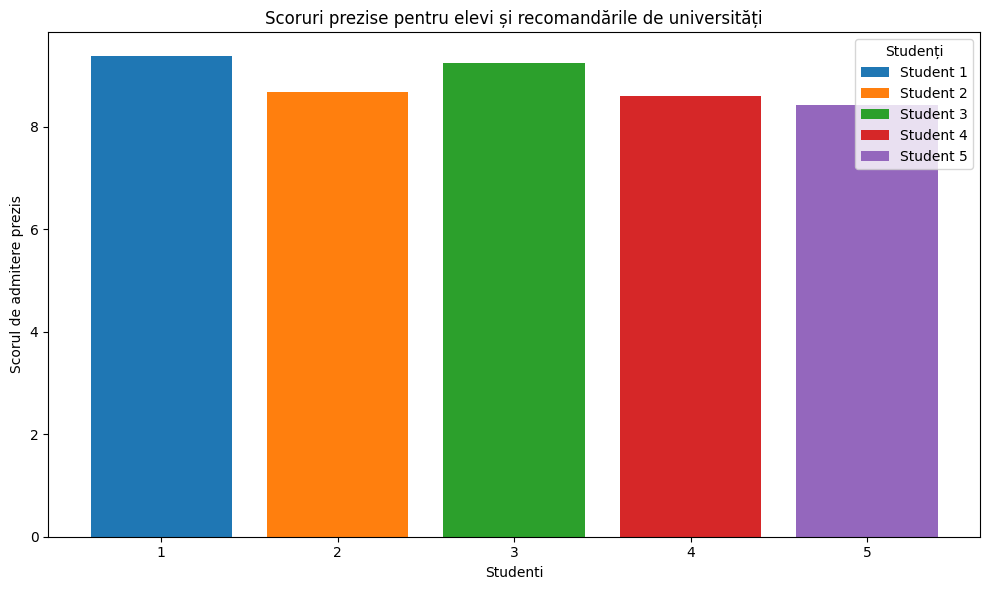

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Funcția pentru recomandarea universității pe baza scorului prezis
def recommend_university(predicted_score):
    if predicted_score >= 9:
        return "Universitate UMFCLUJ, Facultate Medicina Generala"
    elif 8 <= predicted_score < 9:
        return "Universitate UMFCD, Facultate Medicina Dentară"
    else:
        return "Universitate UMF Târgu Mureș, Facultate Farmacie"

# Exemplu de DataFrame cu informațiile elevilor
df = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5],
    'bac_score': [9.5, 8.7, 9.2, 8.6, 8.3],
    'entrance_exam_score': [9.0, 8.5, 9.3, 8.2, 8.1],
    'admission_score': [9.5, 8.7, 9.2, 8.6, 8.3],  # Scorurile reale de admitere
})

# Pregătim datele pentru antrenarea modelului
X = df[['bac_score', 'entrance_exam_score']]  # Caracteristicile de intrare
y = df['admission_score']  # Scorul de admitere real

# Creăm și antrenăm modelul RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predicția scorurilor pentru toți elevii
df['predicted_score'] = rf_model.predict(X)

# Calculăm eroarea medie pătratică (MSE)
mse = mean_squared_error(df['admission_score'], df['predicted_score'])
print(f'Mean Squared Error: {mse}')

# Recomandăm universități pe baza scorurilor prezise
df['recommended_university'] = df['predicted_score'].apply(lambda x: recommend_university(x))

# Vizualizăm rezultatele pentru toți elevii
print(df[['student_id', 'recommended_university', 'predicted_score']])

# Dacă vrei să vizualizezi graficul pentru fiecare elev și distanțele față de universitățile recomandate
import matplotlib.pyplot as plt

# Creăm un grafic cu recomandările pentru fiecare student
plt.figure(figsize=(10, 6))

for student_id in df['student_id'].unique():
    student_data = df[df['student_id'] == student_id]
    plt.bar(student_data['student_id'], student_data['predicted_score'], label=f'Student {student_id}')

plt.title('Scoruri prezise pentru elevi și recomandările de universități')
plt.xlabel('Studenti')
plt.ylabel('Scorul de admitere prezis')
plt.legend(title="Studenți")
plt.tight_layout()

plt.show()


In [5]:
import joblib

# Save model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [10]:
import pandas as pd

# Exemplu de date de intrare cu numele corespunzătoare ale caracteristicilor
input_data = pd.DataFrame([[8.5, 7.8]], columns=["bac_score", "exam_score"])

# Prezicem scorul de admitere
predicted_score = model.predict(input_data)
print(predicted_score)


[8.1955]


In [11]:
recommendations = {}

# Exemplu de recomandare pe baza scorului prezis
student_id = 1  # Poți itera prin toți elevii
predicted_score = 8.5  # Exemplu de scor prezis
recommended_university = "Universitate UMFCLUJ"
recommended_faculty = "Facultate Medicina Generala"

# Adăugăm recomandările pentru acest student în dicționar
recommendations[student_id] = {
    'predicted_score': predicted_score,
    'recommended_university': recommended_university,
    'recommended_faculty': recommended_faculty
}

# Verificăm dicționarul cu recomandări
print(recommendations)


{1: {'predicted_score': 8.5, 'recommended_university': 'Universitate UMFCLUJ', 'recommended_faculty': 'Facultate Medicina Generala'}}


In [12]:
import json

# Exemplu de recomandare
recommendations = {
    1: {
        'predicted_score': 8.5,
        'recommended_university': 'Universitate UMFCLUJ',
        'recommended_faculty': 'Facultate Medicina Generala'
    },
    2: {
        'predicted_score': 8.7,
        'recommended_university': 'Universitate UMFCD',
        'recommended_faculty': 'Facultate Medicina Dentară'
    }
}

# Salvăm dicționarul într-un fișier JSON
with open('recommendations.json', 'w') as json_file:
    json.dump(recommendations, json_file)

print("Recomandările au fost salvate în fișierul recommendations.json")


Recomandările au fost salvate în fișierul recommendations.json
